# 📊 03_eda_advanced.ipynb

## 🧩 Purpose
In this notebook, we explore how various weather conditions and time-based features affect bike rental demand in Seoul.  
Using the preprocessed dataset `bike_with_weather.csv`, we will count bike rentals by hour and visualizing it to skim which features affects the number of bike rentals.

## 📥 Input Datasets
- data/processed/bike_with_weather.csv: Merged dataset combining bike rentals and weather conditions

## 🎯 Goal
- Investigate patterns in bike rental demand
- Identify trends and correlations
- Derive insights that can inform demand forecasting

## ✅ Output
- Visualized rental trend:
  - Daily rental counts by average temperature
  - Correlations between features and rental count
- data/processed/hourly_count_with_weather.csv: Hourly counted bike rentals with weather features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing setting
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
bike_df = pd.read_csv("/Users/crunchy__child/seoul-bike-demand/data/processed/bike_with_weather.csv", encoding="utf-8")

# Convert rental_datetime column to datetime
bike_df['rental_datetime'] = pd.to_datetime(bike_df['rental_datetime'], errors='coerce')

In [ ]:
# Count rental by hour
hourly_df = bike_df.groupby(bike_df['rental_datetime'].dt.floor('h')).agg({
    'duration_min': 'count',  # Use duration_min to count
    'avg_temp_C': 'mean',
    'daily_rain_mm': 'mean',
    'avg_wind_mps': 'mean',
    'avg_humidity_pct': 'mean',
    'total_sunlight_hr': 'mean',
    'temp_range': 'mean',
    'rain_binary': 'first',
    'rental_hour': 'mean',
    'rental_weekday': 'first',
    'is_weekend': 'first'
}).reset_index()

hourly_df = hourly_df.rename(columns={
    'rental_datetime': 'datetime',
    'duration_min': 'rental_count'
})

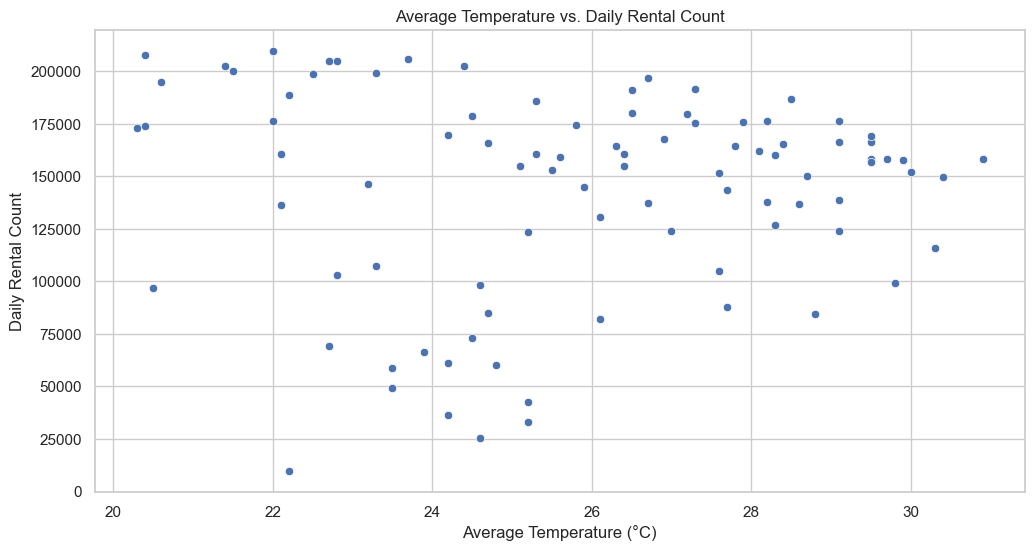

In [6]:
# Rental counts by average temperature
hourly_df['date'] = hourly_df['datetime'].dt.date
daily_summary = hourly_df.groupby('date').agg({ # group by date
    'rental_count': 'sum',
    'avg_temp_C': 'mean'
}).reset_index()

sns.scatterplot(data=daily_summary, x='avg_temp_C', y='rental_count')
plt.title('Average Temperature vs. Daily Rental Count')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Daily Rental Count')
plt.show()

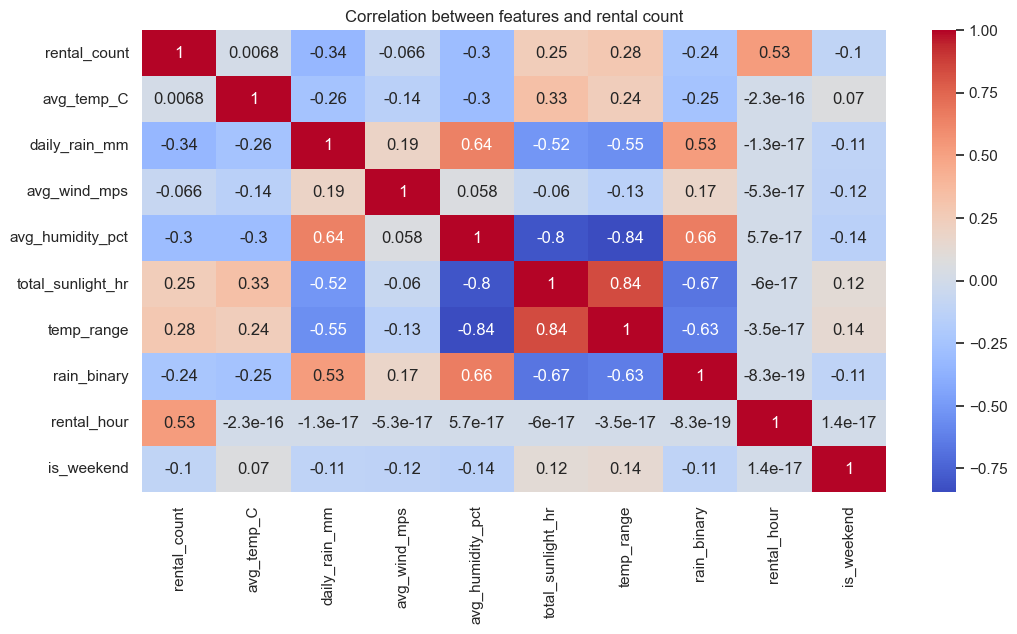

In [ ]:
# Correlations between features and rental count
corr = hourly_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between features and rental count')
plt.show()

In [ ]:
# Convert hourly bike rental counted with weather to csv file
hourly_df.to_csv('/Users/crunchy__child/seoul-bike-demand/data/processed/hourly_count_with_weather.csv', index=False, encoding='utf-8-sig')